# Goal is to answer the question: can a machine detect a person's gender based on their tweet?

Steps:
1. Get twitter data
2. Clean data
3. Build model
5. Test model

## 1. Get Twitter data

In [11]:
# Import libraries
import json
import pprint
import tweepy as tw
import pandas as pd

In [9]:
# Connect to twitter API
path_auth = '/Users/allenj/Documents/Keys/auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)

my_consumer_key = auth['my_consumer_key']
my_consumer_secret = auth['my_consumer_secret']
my_access_token = auth['your_access_token']
my_access_token_secret = auth['my_access_token_secret']

auth = tw.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tw.API(auth)

type(api)

tweepy.api.API

In [387]:
# Upload list of desired users
# Gender 0 = male, 1 = female
users = pd.read_csv('Data/twitter-users3.csv')
users

,user,name,gender,followers_millions,activity
0,BarackObama,Barack Obama,0,118.0,Politician
1,katyperry,Katy Perry,1,108.0,Musician
2,rihanna,Rihanna,1,96.0,Musician
3,taylorswift13,Taylor Swift,1,86.0,Musician
4,Cristiano,Cristiano Ronaldo,0,84.0,Athlete
5,realDonaldTrump,Donald Trump,0,82.0,Politician
6,ladygaga,Lady Gaga,1,81.0,Musician
7,TheEllenShow,Ellen DeGeneres,1,80.0,Comedian
8,ArianaGrande,Ariana Grande,1,74.0,Musician
9,KimKardashian,Kim Kardashian,1,65.0,Celebrity


In [388]:
# Count percentage of male and female users
# Gender 0 = male, 1 = female
users.gender.value_counts(normalize=True, sort=False)

0    0.48
1    0.52
Name: gender, dtype: float64

In [389]:
# Get collection of tweets from these usernames and store it into a new dataframe
list = []

for index, row in users.iterrows():
    tweets = api.user_timeline(screen_name=row['user'], count=150, include_rts=False)
    users_text = [[tweet.user.screen_name, tweet.text, row['gender']] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_text, 
                        columns=["user", "text", "gender"])
    list.append(tweet_text)

# Merge the list    
tweets = pd.concat(list) 

In [390]:
tweets

,user,text,gender
0,BarackObama,We’ve seen the power that our voices have when...,0
1,BarackObama,"On National Gun Violence Awareness Day, we #We...",0
2,BarackObama,"Third, every city in this country should be a ...",0
3,BarackObama,"Second, every mayor should review their use of...",0
4,BarackObama,"First, there are specific evidence-based refor...",0
...,...,...,...
74,justdemi,Throwback to the world premiere of corporatean...,1
75,justdemi,Thank you nytimes for helping me share my stor...,1
76,justdemi,My first headshot… sneak peek #InsideOutBook. ...,1
77,justdemi,"A favorite from #InsideOutBook, bundled up wit...",1


In [391]:
# Count percentage of male and female users
# Gender 0 = male, 1 = female
tweets.gender.value_counts(normalize=True, sort=False)

0    0.481456
1    0.518544
Name: gender, dtype: float64

In [392]:
# Export to csv for future reference
tweets.to_csv('Data/tweets3.csv')

## 2. Clean data

In [393]:
# Import libraries
import numpy as np
import re
import spacy
from matplotlib import pyplot as plt

In [394]:
# Make it easier to reload the data instead of having to call the API everytime
tweets = pd.read_csv('Data/tweets3.csv')

In [395]:
tweets

,Unnamed: 0,user,text,gender
0,0,BarackObama,We’ve seen the power that our voices have when...,0
1,1,BarackObama,"On National Gun Violence Awareness Day, we #We...",0
2,2,BarackObama,"Third, every city in this country should be a ...",0
3,3,BarackObama,"Second, every mayor should review their use of...",0
4,4,BarackObama,"First, there are specific evidence-based refor...",0
...,...,...,...,...
5792,74,justdemi,Throwback to the world premiere of corporatean...,1
5793,75,justdemi,Thank you nytimes for helping me share my stor...,1
5794,76,justdemi,My first headshot… sneak peek #InsideOutBook. ...,1
5795,77,justdemi,"A favorite from #InsideOutBook, bundled up wit...",1


In [396]:
# Clean text
def clean_text(text):
    # Reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # Remove double quotes
    text = re.sub(r'"', '', text)

    return text

tweets['clean_text'] = tweets['text'].apply(clean_text)

In [397]:
# Remove hyperlinks
tweets['clean_text'] = tweets['clean_text'].str.replace('http\S+|www.\S+', '', case=False)

In [398]:
# Remove patterns
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['clean_text'], "@[\w]*") # Removes all @
tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['clean_text'], "&amp;") # Removes all &
tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['clean_text'], "#[\w]*") # Removes all #

In [374]:
# Use to remove stop words and lemmatize
nlp = spacy.load('en')

def convert_text(text):
    sent = nlp(text)
    ents = {x.text: x for x in sent.ents}
    tokens = []
    for w in sent:
        if w.is_stop or w.is_punct:
            continue
        if w.text in ents:
            tokens.append(w.text)
        else:
            tokens.append(w.lemma_.lower())
    text = ' '.join(tokens)

    return text

In [375]:
tweets['clean_text'] = tweets['clean_text'].apply(convert_text)

/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [399]:
# Remove punctuation, numbers, and special characters
tweets['clean_text'] = tweets['clean_text'].str.replace("[^a-zA-Z#]", " ")

In [400]:
# Remove short words less than 3
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [401]:
# Count the length of characters and remove if unncessary
tweets['clean_length'] = tweets['clean_text'].apply(len)

In [402]:
# Remove rows where character length <= 20
tweets = tweets[tweets.clean_length > 20]

In [403]:
tweets.sample(n=20)

,Unnamed: 0,user,text,gender,clean_text,clean_length
5398,74,jk_rowling,"Oh, Leah - SUCH an incredible picture and I th...",1,Leah SUCH incredible picture think saddest,42
5564,95,neiltyson,"A slo-mo campfire, for those who could use som...",0,campfire those could some warmth light right,44
1811,20,shakira,"Multi-tasking, meeting with the CEO of @SonyMu...",1,Multi tasking meeting with while dedicating ti...,80
4437,33,priyankachopra,Happy to be a part of #IforIndia #SocialForGoo...,1,Happy part Donate proceeds Indi,31
2809,75,Oprah,Ya’ll missed a PARTY on Saturday if you weren’...,1,missed PARTY Saturday weren tuned into Nice Wh...,56
2357,74,KingJames,Saw some reports about execs and agents wantin...,0,some reports about execs agents wanting cancel...,92
1194,39,KimKardashian,New @SKIMS COZY collection out tomorrow! https...,1,COZY collection tomorrow,24
2078,79,BillGates,What’s next for our foundation? I’m particular...,0,What next foundation particularly excited abou...,78
5676,57,joerogan,"Again, obviously I don’t know who is correct b...",0,Again obviously know correct wanted post becau...,71
5752,34,justdemi,Baby me blowing out my birthday candles... Thi...,1,Baby blowing birthday candles This year birthd...,81


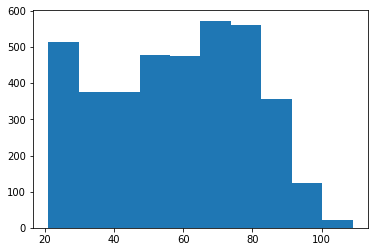

In [404]:
plt.hist(tweets['clean_length'])
plt.show()

## 3. Build Model

In [405]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [406]:
# Bag-of-Words features
bow_vectorizer = CountVectorizer(stop_words='english')

# Bag-of-Words feature matrix
bow = bow_vectorizer.fit_transform(tweets['clean_text'])
df_bow = pd.DataFrame(bow.todense(), columns=bow_vectorizer.get_feature_names())
df_bow

,aaaah,aapka,aapke,aapki,aarav,aatmanirbhar,abdur,aben,abhijit,abigail,...,zero,zimbabwe,zingers,zion,zohaib,zones,zoom,zoomiverse,zootopia,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [407]:
# Import testing set
testset = pd.read_csv('Data/twitter-test.csv')

# Bag-of-Words feature matrix
bow = bow_vectorizer.transform(testset['text'])
df_bow_test = pd.DataFrame(bow.todense(), columns=bow_vectorizer.get_feature_names())
df_bow_test

,aaaah,aapka,aapke,aapki,aarav,aatmanirbhar,abdur,aben,abhijit,abigail,...,zero,zimbabwe,zingers,zion,zohaib,zones,zoom,zoomiverse,zootopia,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Use Bag of Words to Build Model

In [420]:
# Splitting the data into training and validation set
X = df_bow
y = tweets['gender']

# Use Bag-of-Words Features
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X, y, test_size=0.20)

### Use Logistic Regression

In [421]:
# Fitting on Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_bow, y_train_bow)

# The first part of the list is predicting probabilities for gender:0 (male)
# The second part of the list is predicting probabilities for gender:1 (female)
prediction_bow = logreg.predict_proba(X_test_bow)
prediction_bow

array([[0.4315163 , 0.5684837 ],
       [0.31989205, 0.68010795],
       [0.12359591, 0.87640409],
       ...,
       [0.00450552, 0.99549448],
       [0.89182272, 0.10817728],
       [0.44910369, 0.55089631]])

In [422]:
# Calculating the F1 score
# If prediction is greater than or equal to 0.5 than 1, else 0
# Gender, 0 = male and 1 = female
prediction_int = prediction_bow[:,1]>=0.5
prediction_int = prediction_int.astype(np.int)
prediction_int

# Calculating f1 score
log_bow = f1_score(y_test_bow, prediction_int)
log_bow

0.7129411764705883

### Use TF-IDF

In [423]:
# TF-IDF features (Term Frequency-Inverse Document Frequency)
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(tweets['clean_text'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf.get_feature_names())
df_tfidf

,aaaah,aapka,aapke,aapki,aarav,aatmanirbhar,abdur,aben,abhijit,abigail,...,zero,zimbabwe,zingers,zion,zohaib,zones,zoom,zoomiverse,zootopia,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [424]:
# Do the same for the test dataset
# TF-IDF features (Term Frequency-Inverse Document Frequency)
tfidf_matrix=tfidf.transform(testset['text'])
df_tfidf_test = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf.get_feature_names())
df_tfidf_test

,aaaah,aapka,aapke,aapki,aarav,aatmanirbhar,abdur,aben,abhijit,abigail,...,zero,zimbabwe,zingers,zion,zohaib,zones,zoom,zoomiverse,zootopia,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [425]:
# Splitting the data into training and validation set
X = df_tfidf
y = tweets['gender']

# Use Bag-of-Words Features
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2)

In [426]:
# Using TF-IDF Features
logreg.fit(X_train_tfidf, y_train_tfidf)
prediction_tfidf = logreg.predict_proba(X_test_tfidf)
prediction_tfidf

array([[0.66896348, 0.33103652],
       [0.57017503, 0.42982497],
       [0.41060602, 0.58939398],
       ...,
       [0.52251319, 0.47748681],
       [0.42370071, 0.57629929],
       [0.47020118, 0.52979882]])

In [427]:
# Calculating the F1 score
prediction_int = prediction_tfidf[:,1]>=0.5
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_test_tfidf, prediction_int)
log_tfidf

0.7268464243845253